In [275]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.metrics import r2_score,mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt


Reading ou datasets of csv type using pandas library

In [276]:
data = pd.read_csv("CrabAgePrediction.csv")
data.head()

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,F,1.4375,1.1750,0.4125,24.635715,12.332033,5.584852,6.747181,9
1,M,0.8875,0.6500,0.2125,5.400580,2.296310,1.374951,1.559222,6
2,I,1.0375,0.7750,0.2500,7.952035,3.231843,1.601747,2.764076,6
3,F,1.1750,0.8875,0.2500,13.480187,4.748541,2.282135,5.244657,10
4,I,0.8875,0.6625,0.2125,6.903103,3.458639,1.488349,1.700970,6


Our dataset are of different datatypes so we would like to see the data types for each column.

In [277]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3893 entries, 0 to 3892
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             3893 non-null   object 
 1   Length          3893 non-null   float64
 2   Diameter        3893 non-null   float64
 3   Height          3893 non-null   float64
 4   Weight          3893 non-null   float64
 5   Shucked Weight  3893 non-null   float64
 6   Viscera Weight  3893 non-null   float64
 7   Shell Weight    3893 non-null   float64
 8   Age             3893 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 273.9+ KB


In this model, we will be using linear regression to predict the ages of crab based on it's Length, Diameter, Height, Weight, Shucked Weight, Viscera Weight, and Shell Weight.
To avoid encountering errors with datatypes, we would convert the Age column to float for the purpose of this model.

In [278]:
data['Age']=data['Age'].astype(float) # changed the dtype of age from int to float
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3893 entries, 0 to 3892
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             3893 non-null   object 
 1   Length          3893 non-null   float64
 2   Diameter        3893 non-null   float64
 3   Height          3893 non-null   float64
 4   Weight          3893 non-null   float64
 5   Shucked Weight  3893 non-null   float64
 6   Viscera Weight  3893 non-null   float64
 7   Shell Weight    3893 non-null   float64
 8   Age             3893 non-null   float64
dtypes: float64(8), object(1)
memory usage: 273.9+ KB


We will now split the data set into x and y values because for linear regression we need x and y values.

In [279]:
x=data.iloc[:,1:-1]
y=data.iloc[:,8]

In [280]:
print("X contains",x.shape,"rows and columns respectively")
print("y contains",y.shape,"rows and columns respectively")


X contains (3893, 7) rows and columns respectively
y contains (3893,) rows and columns respectively


We will now splt the x and y values further into training and testing datasets in the ratio of 80:20 respectively

In [281]:
from sklearn.model_selection import train_test_split

In [282]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

Building our linear regression model

In [283]:
model= linear_model.LinearRegression()

In [284]:
model=model.fit(x_train,y_train) #training the model withe the training data sets

In [285]:
y_predict=model.predict(x_test)

In [286]:
print('coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean squared error (MSE):%.2f' % mean_squared_error(y_test,y_predict))
print('Coefficient of determination (R^2): %.2f' % r2_score(y_test,y_predict))

coefficients: [-0.63603227  5.38197438  3.87896255  0.30100696 -0.68324292 -0.3205738
  0.33898505]
Intercept: 3.1428325086672118
Mean squared error (MSE):4.95
Coefficient of determination (R^2): 0.55


In [287]:
print(y_test)
print(y_predict)

3407     8.0
1232     4.0
3434     6.0
600      8.0
1206     7.0
        ... 
317     18.0
142      8.0
1751    10.0
1117     7.0
3334     6.0
Name: Age, Length: 779, dtype: float64
[ 8.63920553  5.92491201  7.5362989   8.21259022  7.20789589  9.63901253
  8.15501843  9.76513999 10.77852867 12.02299909  7.08386584  8.92506785
 11.28471372  6.33743953 10.35409644  9.71557727 13.19610962  6.96299205
  9.35030088 10.1832654  15.35343161 10.23420738  8.79004913  9.05939818
 11.90983294 11.24018151  7.76898489 12.10475505 11.78759378  9.71996093
  7.46680138 12.46268043  9.20335485  8.85129928 12.43009758  8.63841585
  8.79056027 11.98408472 10.64831604  9.24081743  8.30438623  7.98141632
 11.22795117  8.9101909  10.35031391  6.11238864  9.63626805  8.87773318
  8.37246227  9.79872924  8.06411169 12.09071921 12.45297703  6.3728971
 12.75589869 12.24828543  6.55732408 11.88712741 11.83758082 12.61598795
 11.93880326 12.31264561  6.96400372  9.36174306  8.42252423  6.84973456
  9.01683509  7.

<Axes: xlabel='Age'>

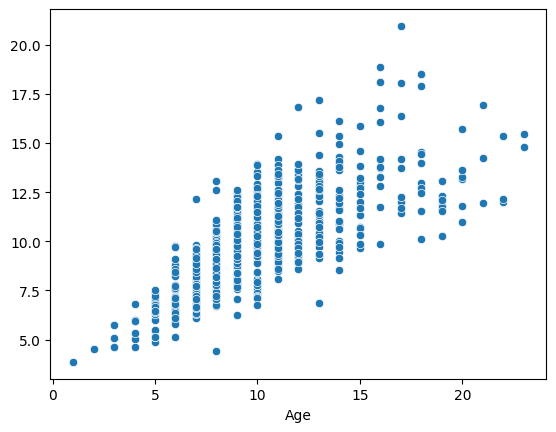

In [288]:
sns.scatterplot(x=y_test,y=y_predict)